In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math


In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.2 MB/s eta 0:00:00


In [ ]:
df = pd.read_csv("delhi_temp.csv")
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df = pd.read_csv("delhi_temp.csv")
df.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
df.isna().sum()

,0
date,0
meantemp,0
humidity,0
wind_speed,0
meanpressure,0


In [ ]:
df.shape

(1462, 5)

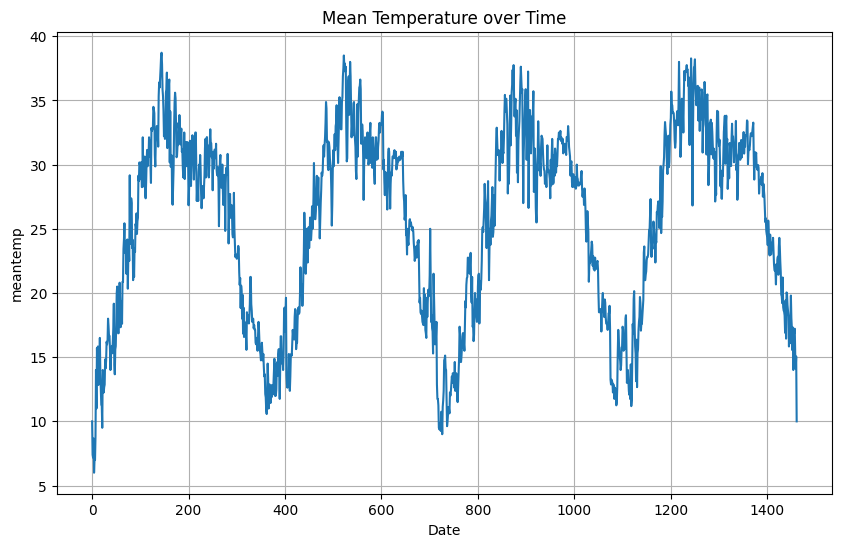

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid(True)

plt.xlabel('Date')
plt.ylabel('meantemp')

plt.plot(df['meantemp'])
plt.title('Mean Temperature over Time')

plt.show()

In [ ]:
df['meantemp'].dtype

dtype('float64')

In [ ]:
df['date'] = pd.to_datetime(df['date'])


In [ ]:
data_range = pd.date_range(start='2013-01-01', periods=1462, freq='D')
data_series = pd.Series(df['meantemp'], index=data_range)

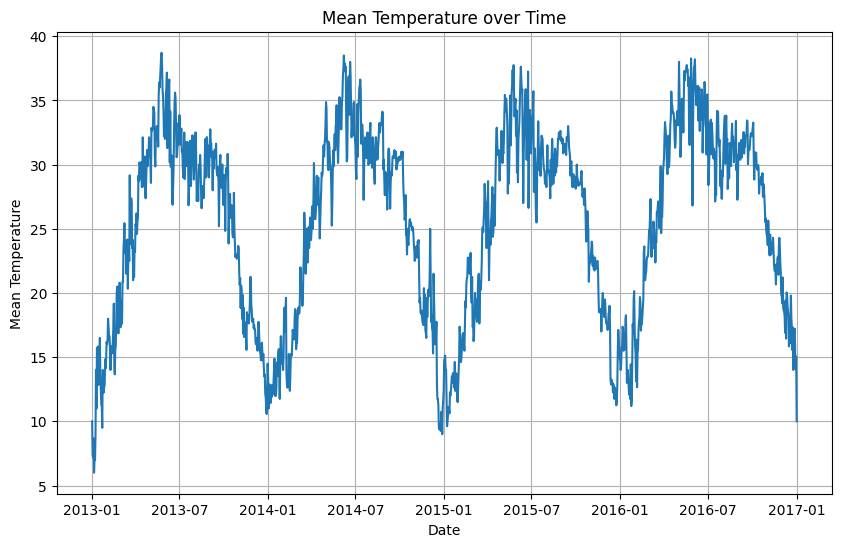

In [ ]:
df.set_index('date', inplace=True)
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.plot(df['meantemp'])
plt.title('Mean Temperature over Time')
plt.show()


In [ ]:
def stationarity_check(timeseries):
  rolmean = timeseries.rolling(window=12).mean()
  rolstd = timeseries.rolling(window=12).std()

  plt.figure(figsize=(10,6))
  plt.grid(True)
  plt.xlabel('Date')
  plt.ylabel('Mean Temperature')
  plt.title("Rolling Mean & Standard Deviation")
  plt.plot(timeseries, color='blue', label='Original')
  plt.plot(rolmean, color='red', label='Rolling Mean')
  plt.plot(rolstd, color='black', label='Rolling Std')
  plt.show()

  print("Dicky Fuller Test Results")
  ad  = adfuller(timeseries , autolag  = 'AIC')
  output = pd.Series(ad[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
  for key,value in ad[4].items():
    output['critical value (%s)' %key] = value
  print(output)

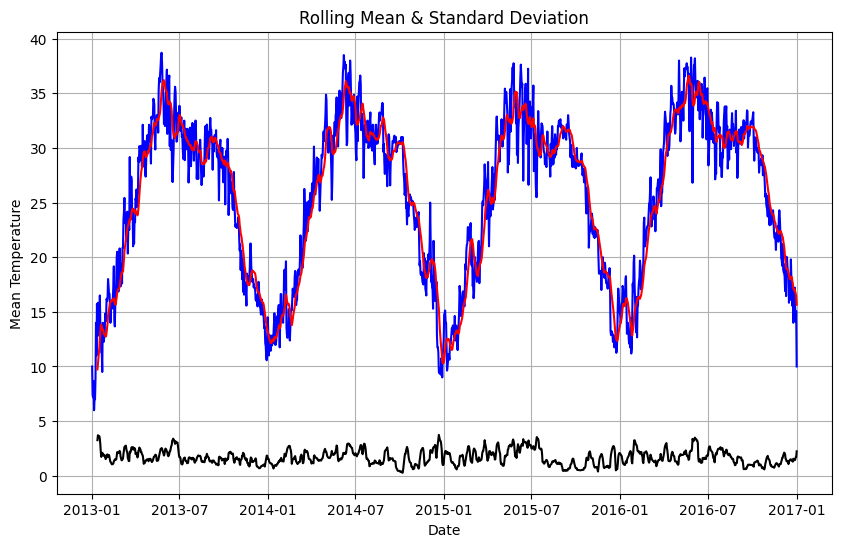

Dicky Fuller Test Results
Test Statistics                  -2.021069
p-value                           0.277412
No. of lags used                 10.000000
Number of observations used    1451.000000
critical value (1%)              -3.434865
critical value (5%)              -2.863534
critical value (10%)             -2.567832
dtype: float64


In [ ]:
stationarity_check(df['meantemp'])

In [ ]:
data_series = data_series.fillna(method = 'ffill')

<ipython-input-21-863d02925706>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_series = data_series.fillna(method = 'ffill')


In [ ]:

meantemp_series = df['meantemp'].squeeze()
print(type(meantemp_series))
data_series = pd.Series(meantemp_series.values, index=data_range)


<class 'pandas.core.series.Series'>


In [ ]:
 # Should output 0 if there are no missing values
print(data_series.head())  # Inspect the first few values


2013-01-01    10.000000
2013-01-02     7.400000
2013-01-03     7.166667
2013-01-04     8.666667
2013-01-05     6.000000
Freq: D, dtype: float64


In [ ]:
print(data_series.isna().sum())

0


<Figure size 640x480 with 0 Axes>

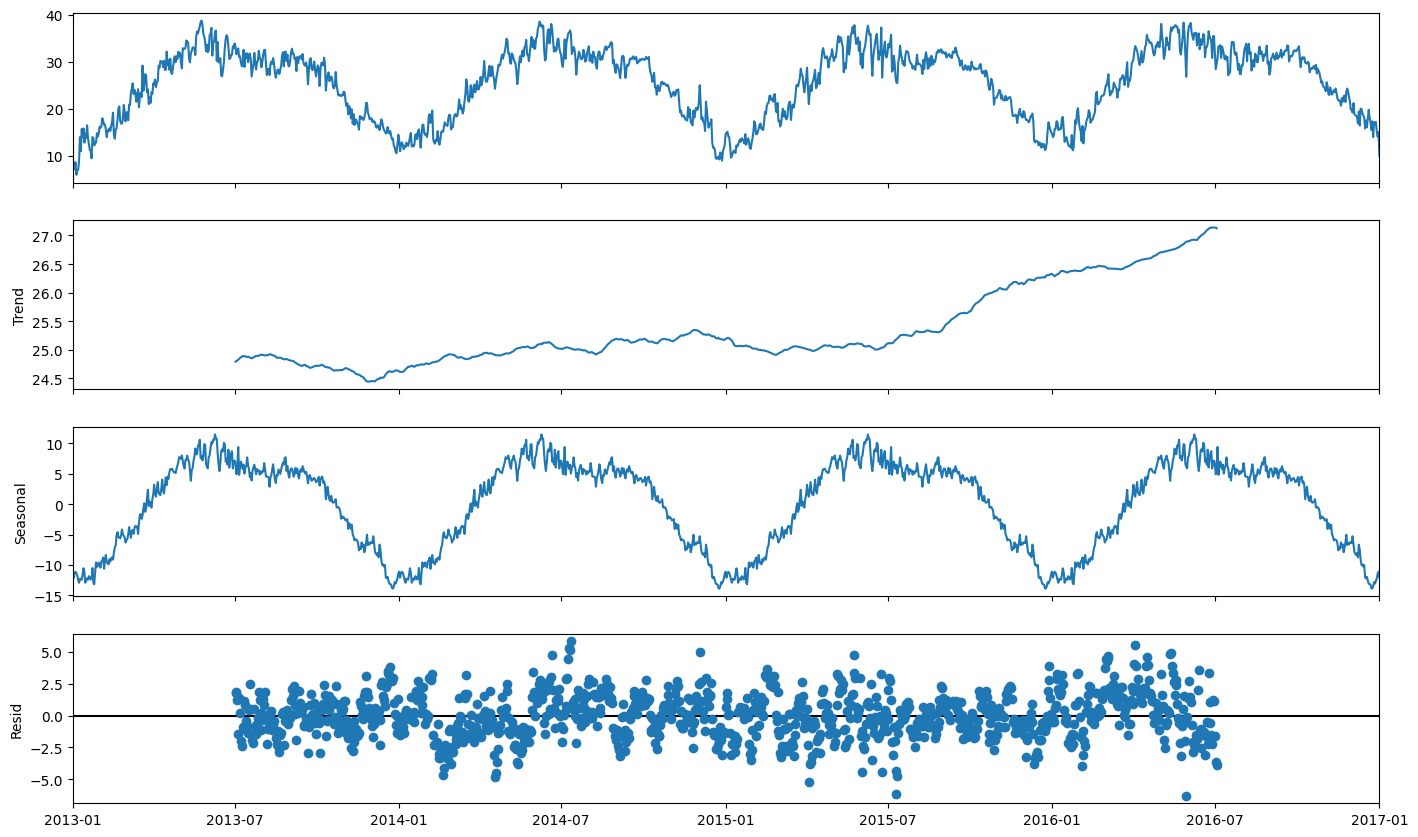

In [ ]:
result = seasonal_decompose(data_series, model='additive', two_sided = True , period = 365)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(16, 9)

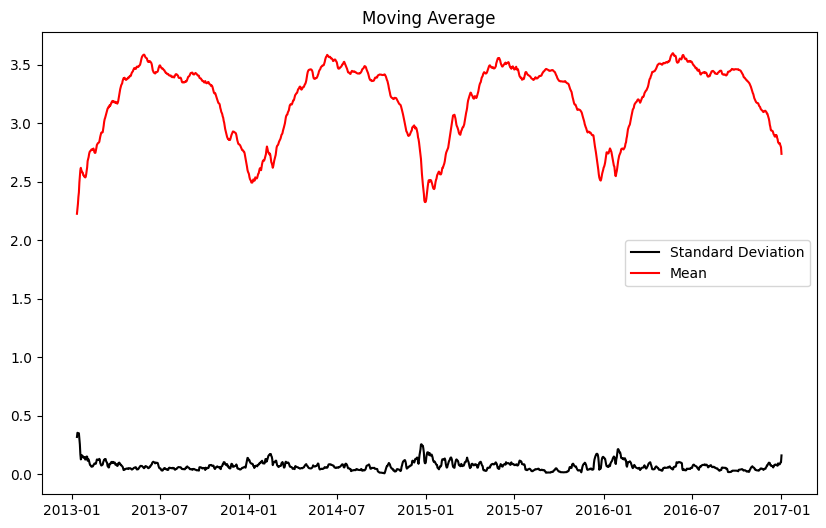

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df.meantemp)
moving_avg = df_log.rolling(12).mean()
std_dev = df_log.rolling(12).std()
plt.legend(loc='best')
plt.title('Moving Average')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

In [ ]:
train_data = pd.read_csv('delhi_temp.csv', parse_dates=['date'], index_col='date')
test_data = pd.read_csv('delhi_temp_test.csv', parse_dates=['date'], index_col='date')


train_data['log_meantemp'] = np.log(train_data['meantemp'])
test_data['log_meantemp'] = np.log(test_data['meantemp'])


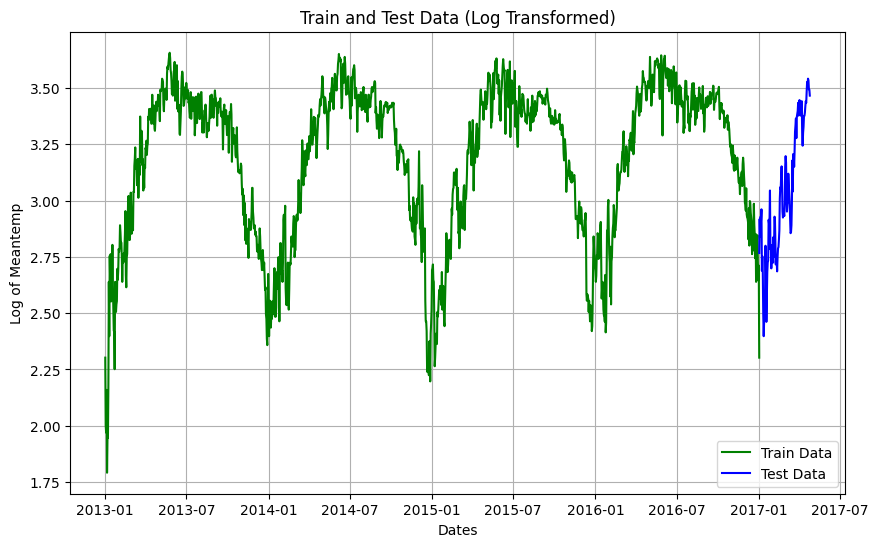

In [ ]:
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Log of Meantemp')
plt.plot(train_data['log_meantemp'], 'green', label='Train Data')
plt.plot(test_data['log_meantemp'], 'blue', label='Test Data')
plt.legend()
plt.title('Train and Test Data (Log Transformed)')
plt.show()

In [ ]:
df2 = df[["humidity","wind_speed" , "meanpressure"]]
model_autoARIMA = auto_arima(df.meantemp, start_p=0, start_q=0,
                      test='adf',       # use adftest to find             optimal 'd'
                      max_p=3, max_q=3,
                      m=365,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal= False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True,
                      exogenous= df2)
print(model_autoARIMA.summary())

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (365) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5650.181, Time=0.23 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5614.068, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5602.114, Time=1.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5648.181, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5544.460, Time=2.87 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5546.100, Time=3.33 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5546.168, Time=2.61 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5573.723, Time=2.32 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5600.849, Time=0.80 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5546.314, Time=8.50 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5542.478, Time=2.64 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5600.115, Time=1.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5612.068, Time=0.27 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=5544.118, Time=2.24 sec
 ARIMA(1,1,2)(0,0,0)[0]          

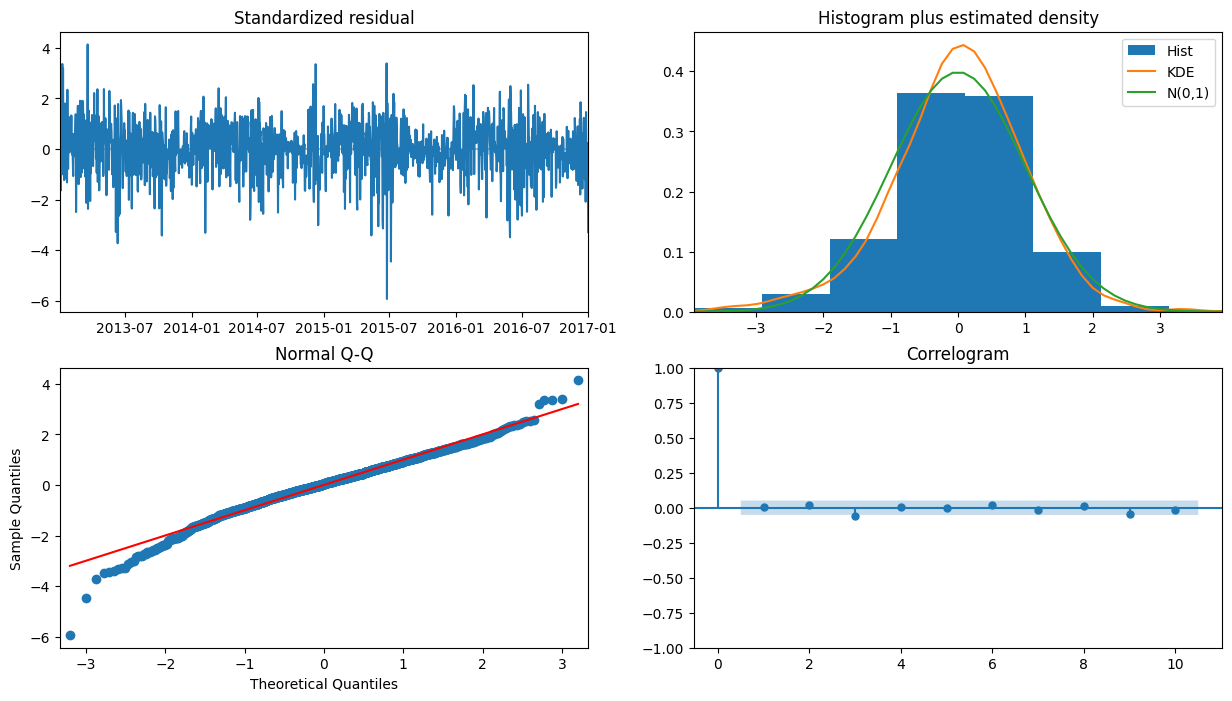

In [ ]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(df.meantemp,
 exog=df2,
 order=(1,0,3),
 enforce_invertibility=False, enforce_stationarity=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
df_test_2  = test_data[test_data.meantemp == 0 ]

In [ ]:
df_test3 = test_data[["humidity","wind_speed" , "meanpressure"]]
results= model.fit()
forecast_1= results.forecast(steps=len(test_data.meantemp), exog=df_test3)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print(forecast_1)

2017-01-02    11.007570
2017-01-03    11.067545
2017-01-04     9.888377
2017-01-05    11.467572
2017-01-06    10.779993
                ...    
2017-04-21    12.654673
2017-04-22    10.913660
2017-04-23    10.594839
2017-04-24    12.383512
2017-04-25    12.317474
Freq: D, Name: predicted_mean, Length: 114, dtype: float64


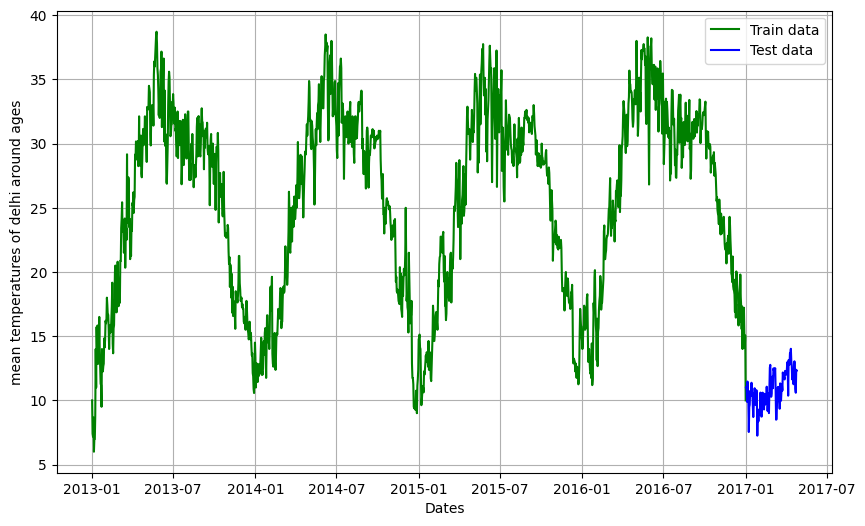

In [ ]:
train_data = train_data.meantemp
test_data = forecast_1
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('mean temperatures of delhi around ages')
plt.plot(train_data, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()